In [568]:
from datasets import load_dataset
import tensorflow as tf
import pandas as pd
import spacy

dataset  = load_dataset('banking77')

Using custom data configuration default
Reusing dataset banking77 (C:\Users\barka\.cache\huggingface\datasets\banking77\default\1.1.0\aec0289529599d4572d76ab00c8944cb84f88410ad0c9e7da26189d31f62a55b)


  0%|          | 0/2 [00:00<?, ?it/s]

In [879]:
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame( dataset['test'])

In [1035]:
import plotly.express as ply

fig = ply.histogram(train_df,x='label')
fig.show()

In [571]:

fig = ply.histogram(test_df,x='label')
fig.show()

In [572]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [573]:
from wordcloud import WordCloud,STOPWORDS

stop_words = set(STOPWORDS)

In [938]:
from tqdm import tqdm,trange
import matplotlib.pyplot as plt


nlp = spacy.load('en_core_web_lg',disable=['tok2vec', 'attribute_ruler', 'lemmatizer', 'ner'])
stop_words = nlp.Defaults.stop_words
def preprocess_data(texts):
    processed_text = []
    # print(len(texts))
    for text in tqdm(texts):
        tokens = nlp(text)
        # print(len(tokens))
        # for token in tokens:
        # print(len(tokens))
        # doc = [token.text.lower().strip() for token in tokens if not( token.is_stop or token.is_punct)] 
        doc = [token.text.lower().strip() for token in tokens] 
        doc = ' '.join(doc)
        processed_text.append(doc)
    return processed_text


def generate_wordcloud(tokens, max_words=100,max_font_size=50,background_color='white',save_image=False):
    
    wordcloud = WordCloud(stopwords=stop_words,
                width=800,
                height=700,
                background_color=background_color,
                max_font_size=max_font_size,
                max_words=max_words).generate(str(tokens))
    
    if save_image:
        wordcloud.to_file(str(max_words)+'_wordcloud.png') # will save the image in the directory

    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
 
    plt.show()
        


In [940]:
nlp.pipe_names

['tagger', 'parser']

In [941]:
tokens = nlp('adasd adasf fad is ?')
doc=None
for token in tokens:
    doc = [token.text for token in tokens if not( token.is_stop or token.is_punct)]


In [942]:
' '.join(doc)

'adasd adasf fad'

In [1008]:
# print(stop_words)

processed_data = preprocess_data(train_df['text'].values)


100%|██████████| 10003/10003 [00:09<00:00, 1068.08it/s]


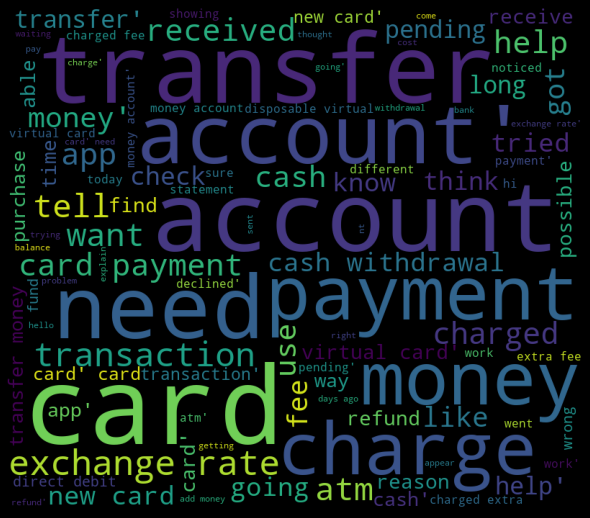

In [ ]:
generate_wordcloud(processed_data,100,max_font_size=150,background_color='black',save_image=True)

In [1009]:
train_df['processed_text'] = processed_data

In [1010]:
train_df.head()

,text,label,processed_text
0,I am still waiting on my card?,11,i am still waiting on my card ?
1,What can I do if my card still hasn't arrived ...,11,what can i do if my card still has n't arrived...
2,I have been waiting over a week. Is the card s...,11,i have been waiting over a week . is the card ...
3,Can I track my card while it is in the process...,11,can i track my card while it is in the process...
4,"How do I know if I will get my card, or if it ...",11,"how do i know if i will get my card , or if it..."


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000,oov_token=20)
text = Tokenizer("card arrived 2 weeks")

In [ ]:
text.texts_to_sequences_generator()

In [ ]:
train_df['processed_text'][:10]

0                     [waiting, card]
1           [card, arrived, 2, weeks]
2       [waiting, week, card, coming]
3    [track, card, process, delivery]
4                  [know, card, lost]
5                   [send, new, card]
6              [info, card, delivery]
7               [received, new, card]
8           [package, card, tracking]
9                     [ordered, card]
Name: processed_text, dtype: object

In [1011]:
# test_Sd = tf.constant()
textVectorization_layer = TextVectorization(max_tokens=15000,output_mode='int',output_sequence_length=50)
textVectorization_layer.adapt(train_df['text'])

In [ ]:
print(stop_words)
# top up , top-up, due, through, until, still, 

{'has', 'our', 'hence', 'off', 'itself', 'namely', 'do', 'until', 'its', 'fifteen', 'thus', 'all', 'three', 'next', 'unless', 'thereby', 'others', 'third', 'due', 'thru', 'whereafter', 'therein', 'again', 'everything', 'always', 'empty', 'being', 'become', 'both', 'several', 'one', 'so', 'yourself', 'beforehand', 'whole', 'of', 'nine', 'less', 'any', 'meanwhile', 'yours', 'without', 'every', 'some', 'within', 'own', 'keep', 'too', 'most', 'go', 'onto', 'eight', 'or', 'n‘t', 'how', 'those', '’s', '’ll', 'had', 'the', 'her', 'seem', 'indeed', 'though', "'re", 'anyone', "n't", 'mine', 'still', '‘ll', 'further', 'whither', 'two', 'wherein', 'none', 'than', 'throughout', 'then', 'except', 'by', 'amongst', 'whereby', 'thereupon', 'hereupon', 'for', 'after', 'out', 'he', 'please', 'beyond', 'hundred', 'something', 'at', 'nevertheless', 'between', 'nowhere', '‘ve', 'have', 'myself', 'n’t', "'s", 'am', 'hereafter', 'herein', 'might', 'seeming', 'twelve', 'what', 'everyone', 'nor', 'elsewhere', 

In [944]:
train_df['processed_text'][680:681]

680    i see an extra $ 1  charge on my statement , w...
Name: processed_text, dtype: object

In [ ]:
model = tf.keras.models.Sequential()

# Start by creating an explicit input layer. It needs to have a shape of
# (1,) (because we need to guarantee that there is exactly one string
# input per batch), and the dtype needs to be 'string'.
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))

# The first layer in our model is the vectorization layer. After this
# layer, we have a tensor of shape (batch_size, max_len) containing vocab
# indices.
model.add(textVectorization_layer)

In [ ]:
input_data = [["card waiting"], ["transcation direct debit"]]
model.predict(input_data)

1/1 [==============================] - 0s 65ms/step


array([[   2,  109,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [1021,   77,   60,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]], dtype=int64)

In [ ]:
len(textVectorization_layer.get_vocabulary())

In [1013]:
# train_df = pd.get_dummies(train_df , columns=['label'])
labels = train_df['label']

In [772]:
labels = tf.constant(labels)

In [1023]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = tf.data.Dataset.from_tensor_slices((train_df['text'],labels)).shuffle(buffer_size=10000,seed=42).batch(32).cache().prefetch(buffer_size=AUTOTUNE)

In [1024]:
def vectorize_text(text, label):
  print(text.shape)
  text = tf.expand_dims(text, -1)
  print(text.shape)
  # label = tf.expand_dims(label,-1)
  return textVectorization_layer(text), label

In [1025]:
train_ds = train_ds.map(vectorize_text)

(None,)
(None, 1)


In [ ]:
text_batch, label_batch = next(iter(train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", first_label)
print("Vectorized review", vectorize_text(first_review, first_label))

In [1029]:
def get_dataset_partitions_tf(ds, ds_size, train_split=0.8, val_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split  + val_split) == 1
    
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    print(val_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    # test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds

In [970]:
train_df.shape

(10003, 3)

In [1030]:
train_ds, val_ds = get_dataset_partitions_tf(train_ds, 312, train_split=0.8, val_split=0.2, shuffle=False, shuffle_size=10000)

62


In [674]:
embed = Embedding(1000,64,input_length=50)

In [1037]:
from tensorflow.keras.layers import Embedding,TextVectorization

model = tf.keras.Sequential([
    # TextVectorization(max_tokens=10000, output_mode='int',output_sequence_length=50),
    Embedding(10000,64,input_length=50),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(300,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(200,return_sequences=True)),
    tf.keras.layers.LSTM(100),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(77,activation='softmax')
    ])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])


In [1021]:
model.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_69 (Embedding)    (None, 50, 64)            640000    
                                                                 
 bidirectional_121 (Bidirect  (None, 50, 600)          658800    
 ional)                                                          
                                                                 
 bidirectional_122 (Bidirect  (None, 50, 400)          962400    
 ional)                                                          
                                                                 
 lstm_3 (LSTM)               (None, 100)               200400    
                                                                 
 dense_50 (Dense)            (None, 77)                7777      
                                                                 
Total params: 2,469,377
Trainable params: 2,469,377
N

In [875]:
# .take(1)
for x,y in val_ds.take(1):
    print(x,y)

tf.Tensor(
[[ 10  31  12 ...   0   0   0]
 [  3 990  13 ...   0   0   0]
 [ 31 105 276 ...   0   0   0]
 ...
 [ 10  31 276 ...   0   0   0]
 [ 42  38  10 ...   0   0   0]
 [344 105  23 ...   0   0   0]], shape=(32, 50), dtype=int64) tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape=(32, 77), dtype=uint8)


In [1038]:
model.fit(train_ds,epochs=2,validation_data=val_ds)

Epoch 1/2
249/249 [==============================] - 566s 2s/step - loss: 4.3424 - accuracy: 0.0159 - val_loss: 4.3409 - val_accuracy: 0.0136
Epoch 2/2
249/249 [==============================] - 573s 2s/step - loss: 4.3396 - accuracy: 0.0157 - val_loss: 4.3371 - val_accuracy: 0.0166


In [1001]:
for x,y in train_ds.take(1):
    print(x,y)

tf.Tensor(
[[  2  64 182 498   3  69   7  46  52   9  31 213   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]], shape=(1, 50), dtype=int64) tf.Tensor(11, shape=(), dtype=int64)
